---
- **Capacita Brasil - C-Jovem - Jan/2025**
- **Uece - Ciência de Dados**
- **Alan Delon Sousa Rocha**
---

# Ciência de Dados Intermediário
---
# Oficina 1: Modelo de previsão de temperaturas


## 1. Preparação do Ambiente

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error

## 2. Preparação dos Dados

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


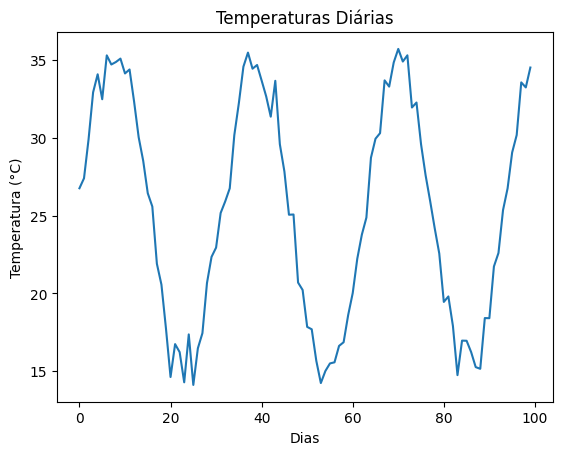

In [14]:
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Transformando os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(data, columns=["Temperatura"])  # Fixed quotes

# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados
print(df.head())

# Visualizando os dados de temperatura para ter uma ideia das tendências
plt.plot(df)
plt.title("Temperaturas Diárias")  # Fixed quotes
plt.xlabel("Dias")  # Fixed quotes
plt.ylabel("Temperatura (°C)")  # Fixed quotes
plt.show()

## Passo 3: Pré-processamento dos Dados

In [15]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Criando as sequências para o modelo LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definindo o tamanho da sequência (últimos 30 dias para prever o próximo)
sequence_length = 30

# Criando as sequências
X, y = create_sequences(scaled_data, sequence_length)

# Dividindo em conjuntos de treino e teste (70% treino, 30% teste)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Formato dos dados de treino: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Formato dos dados de teste: X_test {X_test.shape}, y_test {y_test.shape}")

Formato dos dados de treino: X_train (49, 30, 1), y_train (49, 1)
Formato dos dados de teste: X_test (21, 30, 1), y_test (21, 1)


## Passo 4: Construção da Rede LSTM

In [16]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Resumo da arquitetura do modelo
model.summary()

/home/adsr/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

### Treinamento do modelo


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - loss: 0.4844 - val_loss: 0.2189
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.4053 - val_loss: 0.1953
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.3643 - val_loss: 0.1741
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3085 - val_loss: 0.1545
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.2644 - val_loss: 0.1362
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2341 - val_loss: 0.1204
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1909 - val_loss: 0.1087
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1495 - val_loss: 0.1065
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1208 - val_loss: 0.1272
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1015 - val_loss: 0.1802
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1207 - val_loss: 0.2051
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1252 - val_loss: 0.1

## Passo 5: Avaliação e Previsão

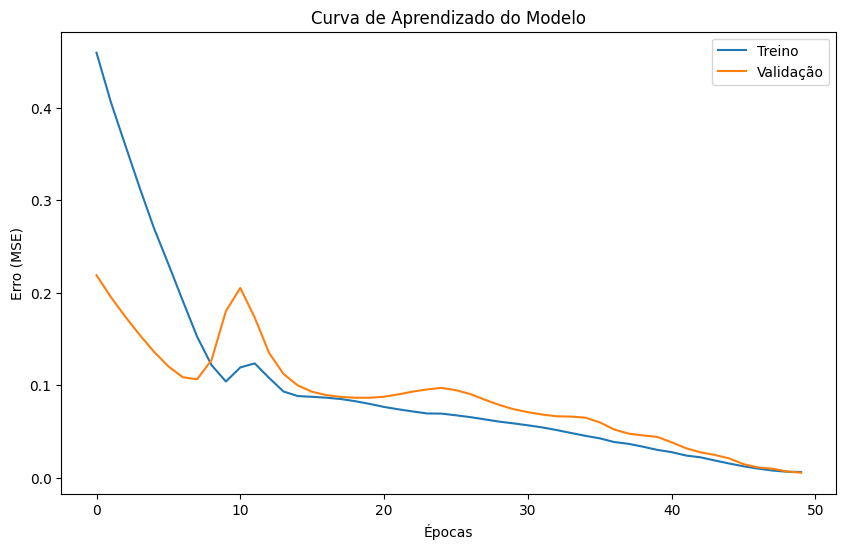

In [18]:
# Visualizando a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Aprendizado do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Erro (MSE)')
plt.legend()
plt.show()

In [19]:
# Fazendo previsões
y_pred = model.predict(X_test)

# Desnormalizando os resultados para obter as temperaturas reais
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculando métricas de erro
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Erro Quadrático Médio (MSE): 2.5975
Raiz do Erro Quadrático Médio (RMSE): 1.6117
Erro Absoluto Médio (MAE): 1.2967


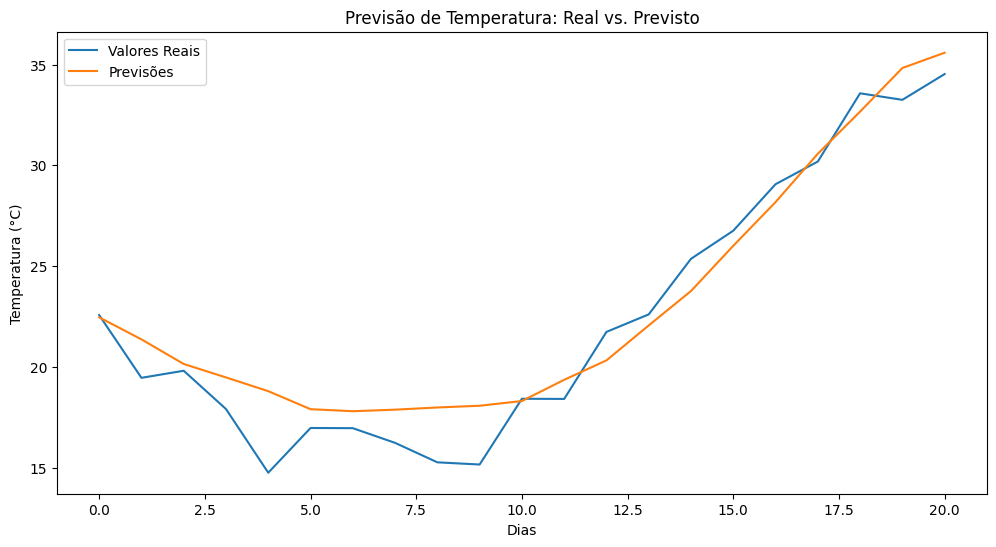

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Temperatura prevista para amanhã: 35.64°C


In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Valores Reais')
plt.plot(y_pred_actual, label='Previsões')
plt.title('Previsão de Temperatura: Real vs. Previsto')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Fazendo uma previsão para a temperatura de amanhã
# Pegando os últimos 30 dias do conjunto de dados
last_30_days = scaled_data[-30:].reshape(1, 30, 1)
next_day_pred = model.predict(last_30_days)
next_day_temp = scaler.inverse_transform(next_day_pred)[0, 0]

print(f"Temperatura prevista para amanhã: {next_day_temp:.2f}°C")